<a href="https://colab.research.google.com/github/Vivek-afk81/data_mining/blob/main/classification_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/data_mining')
print(os.getcwd())

/content/drive/My Drive/data_mining


##k-NEAREST NEIGHBORS


###Import libraries


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,plot_tree

###Load and prepare the data


In [ ]:
trn=pd.read_csv('data/spambase_trn.csv')
X_trn=trn.drop('y',axis=1)
y_trn=trn['y']
tst=pd.read_csv('data/spambase_tst.csv')
X_tst=tst.drop('y',axis=1)
y_tst=tst['y']
spam=['Not Spam','Spam']
trn.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.00,0.00,0.00,0.0,0.0,0.00,1.21,0.00,0.0,1.21,...,0.0,0.000,0.0,0.000,0.000,0.000,1.676,15,57,1
1,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,...,0.0,0.208,0.0,0.417,0.208,0.000,3.812,16,61,1
2,0.33,0.00,0.33,0.0,0.0,0.00,0.66,0.00,0.0,0.00,...,0.0,0.116,0.0,0.406,0.464,0.348,6.932,43,513,1
3,0.52,1.31,0.26,0.0,2.9,0.26,0.79,0.26,0.0,0.79,...,0.0,0.138,0.0,0.046,0.000,0.000,2.934,60,135,1
4,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,14.000,53,56,0


###k-NN : Train the model

In [ ]:
knn=KNeighborsClassifier(
    n_neighbors=5
)
knn.fit(X_trn,y_trn)

KNeighborsClassifier()

###Calculate Mean Accuracy on the Training Data


In [ ]:
print("Accuracy on the training data: "+str("{:.2%}".format(knn.score(X_trn,y_trn))))

Accuracy on the training data: 86.86%


###Optimizing the kNN model using gridSearchCV

In [ ]:
knn=KNeighborsClassifier()
param=range(3,15,2)

#sets up GridSearchCV object and stores it in a grid variable
grid=GridSearchCV(
    knn,
    {'n_neighbors':param}
)

best_knn=grid.fit(X_trn,y_trn)
best_knn=grid.best_estimator_

best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

###Plot the Accuracy by Neighbors Parameter
Once the optimal parameters are found, the accuracy for different parameters can be compared by plotting. The grid variable has an attribute
cv_results_, which is a dictionary of key value pairs and stores the cross validation accuracy for each parameter.

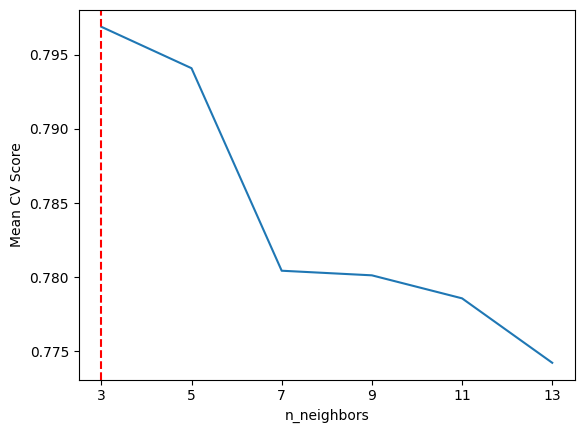

In [ ]:
# Plots mean_test_scores vs. total neighbors
plt.plot(
param,
grid.cv_results_['mean_test_score'])

# Adds labels to the plot
plt.xticks (param)
plt.ylabel('Mean CV Score' )
plt.xlabel('n_neighbors' )

# Draws a vertical line where the best model is
plt.axvline(
x=best_knn.n_neighbors,
color='red',
ls='--')

###TEST MODEL
In this phase, we'll evaluate the accuracy of the trained kNN model on the test set. A good evaluation measure is the confusion matrix that gives the
fraction of true positives, true negatives, false positives, and false negatives.

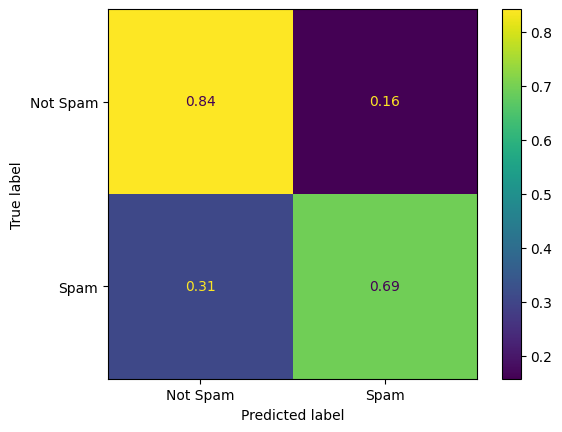

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    best_knn, X_tst, y_tst,
    display_labels=spam,
    normalize='true'
)

In [ ]:
print(
'Accuracy on testing data: '
+ str("{:.2%}".format(best_knn.score(X_tst, y_tst) ) ))

Accuracy on testing data: 78.06%


##NAIVE BAYES

In [ ]:
nb= GaussianNB()
nb.fit(X_trn,y_trn)

GaussianNB()

###NAIVE BAYES: TRAIN MODEL
The code below creates a GaussianNB object to classify spam vs. not spam using the naive Bayes algorithm.

In [ ]:
print(
    'Accuracy on training data: '
    +str("{:.2%}".format(nb.score(X_trn,y_trn)))
)

Accuracy on training data: 81.30%


###Test Model

In this phase, we test the naive Bayes model on the test set tst . A good evaluation measure is the confusion matrix that gives the fraction of true
positives, true negatives, false positives, and false negatives.


### Visualize the Confusion matrix
Normalize the score to display as proportions across rows

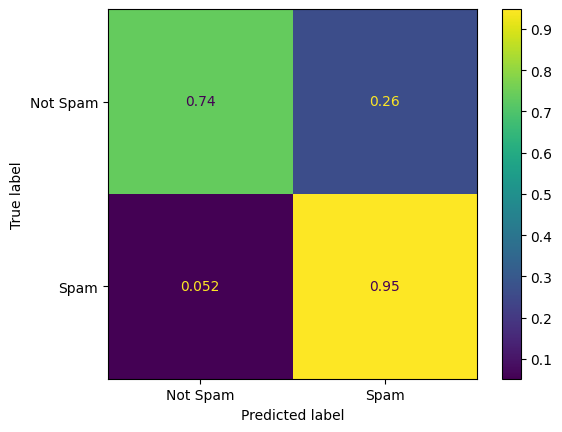

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    nb, X_tst, y_tst,
    display_labels=spam,
    normalize='true'
)

###Calculate Mean Accuracy on the testing data

In [ ]:
print(
'Accuracy on testing data: '
+ str("{:.2%}".format(nb.score(X_tst, y_tst) ) ))

Accuracy on testing data: 82.48%


##Decision Trees

###DECISION TREE: TRAIN MODEL

####Fit the Training Data
A simple method to learn a decision tree is to create a DecisionTreeClassifier object and fit it to the training data. The object has a method
score () that returns the accuracy of the model on the given data. The DecisionTreeClassifier requires two parameters:

* criterion : Can be entropy or gini
* max_leaf_nodes : Specifies the size of the tree by explicitly stating the total leaf nodes

In [ ]:
# Creates a DecisionTreeClassifier object
dt = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42,
    max_leaf_nodes=7)

# Fits the decision tree to training data
dt.fit(X_trn,y_trn)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=7, random_state=42)

###Calculate Mean Accuracy on Training Data

In [ ]:
print(
'Accuracy on training data: '
+ str("{:.2%}".format(dt.score(X_trn, y_trn))))

Accuracy on training data: 90.22%


###Optimize the Decision Tree
The GridSearchCV object can be used to find the optimal decision tree. This object can be set up by specifying a range of values for max_leaf_nodes
and the two possible values of criterion . In the code below GridSearchCV is set up with the default 5 fold cross validation.

In [ ]:
# Define the base Decision Tree model
dt = DecisionTreeClassifier(random_state=1)

# Possible values for max_leaf_nodes
param = range(6, 45, 2)

# Set up GridSearchCV
grid = GridSearchCV(
    estimator=dt,
    param_grid={
        'max_leaf_nodes': param,
        'criterion': ['entropy', 'gini']
    },
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the grid search to training data
grid.fit(X_trn, y_trn)

# Store the best model
best_dt = grid.best_estimator_

# Display best hyperparameters
print("Best parameters:", grid.best_params_)

# Display all parameters of the best model
print("Best model parameters:", best_dt.get_params())


Best parameters: {'criterion': 'gini', 'max_leaf_nodes': 36}
Best model parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 36, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 1, 'splitter': 'best'}


###Plot Accuracy Against Various Parameters
The code below creates a plot of accuracy against various values of max_leaf_nodes . The gini and entropy measures are plotted separately.

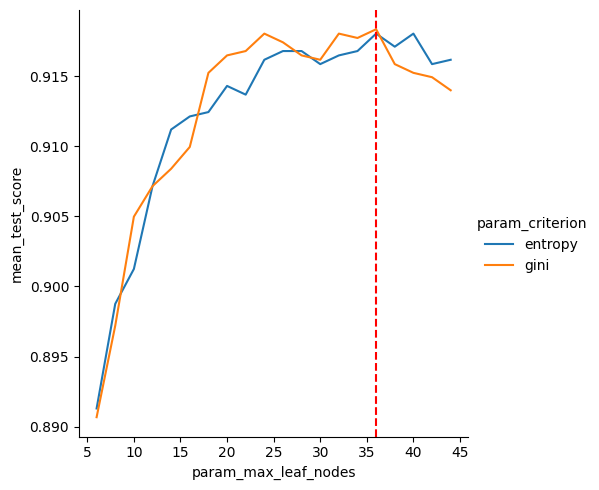

In [ ]:
cv_results = pd.DataFrame.from_dict(grid.cv_results_,orient='columns')

# Plot mean accuracy vs max_leaf_nodes
sns.relplot(
    data=cv_results,
    kind='line',
    x='param_max_leaf_nodes',
    y='mean_test_score',
    hue='param_criterion'
)

# Draw a vertical red line at the best max_leaf_nodes value
plt.axvline(
    x=best_dt.max_leaf_nodes,
    color='red',
    ls='--'
)

###Display the Decision Tree
Use plot_tree() to display the decision tree. The two class labels have two different shades to distinguish between them.

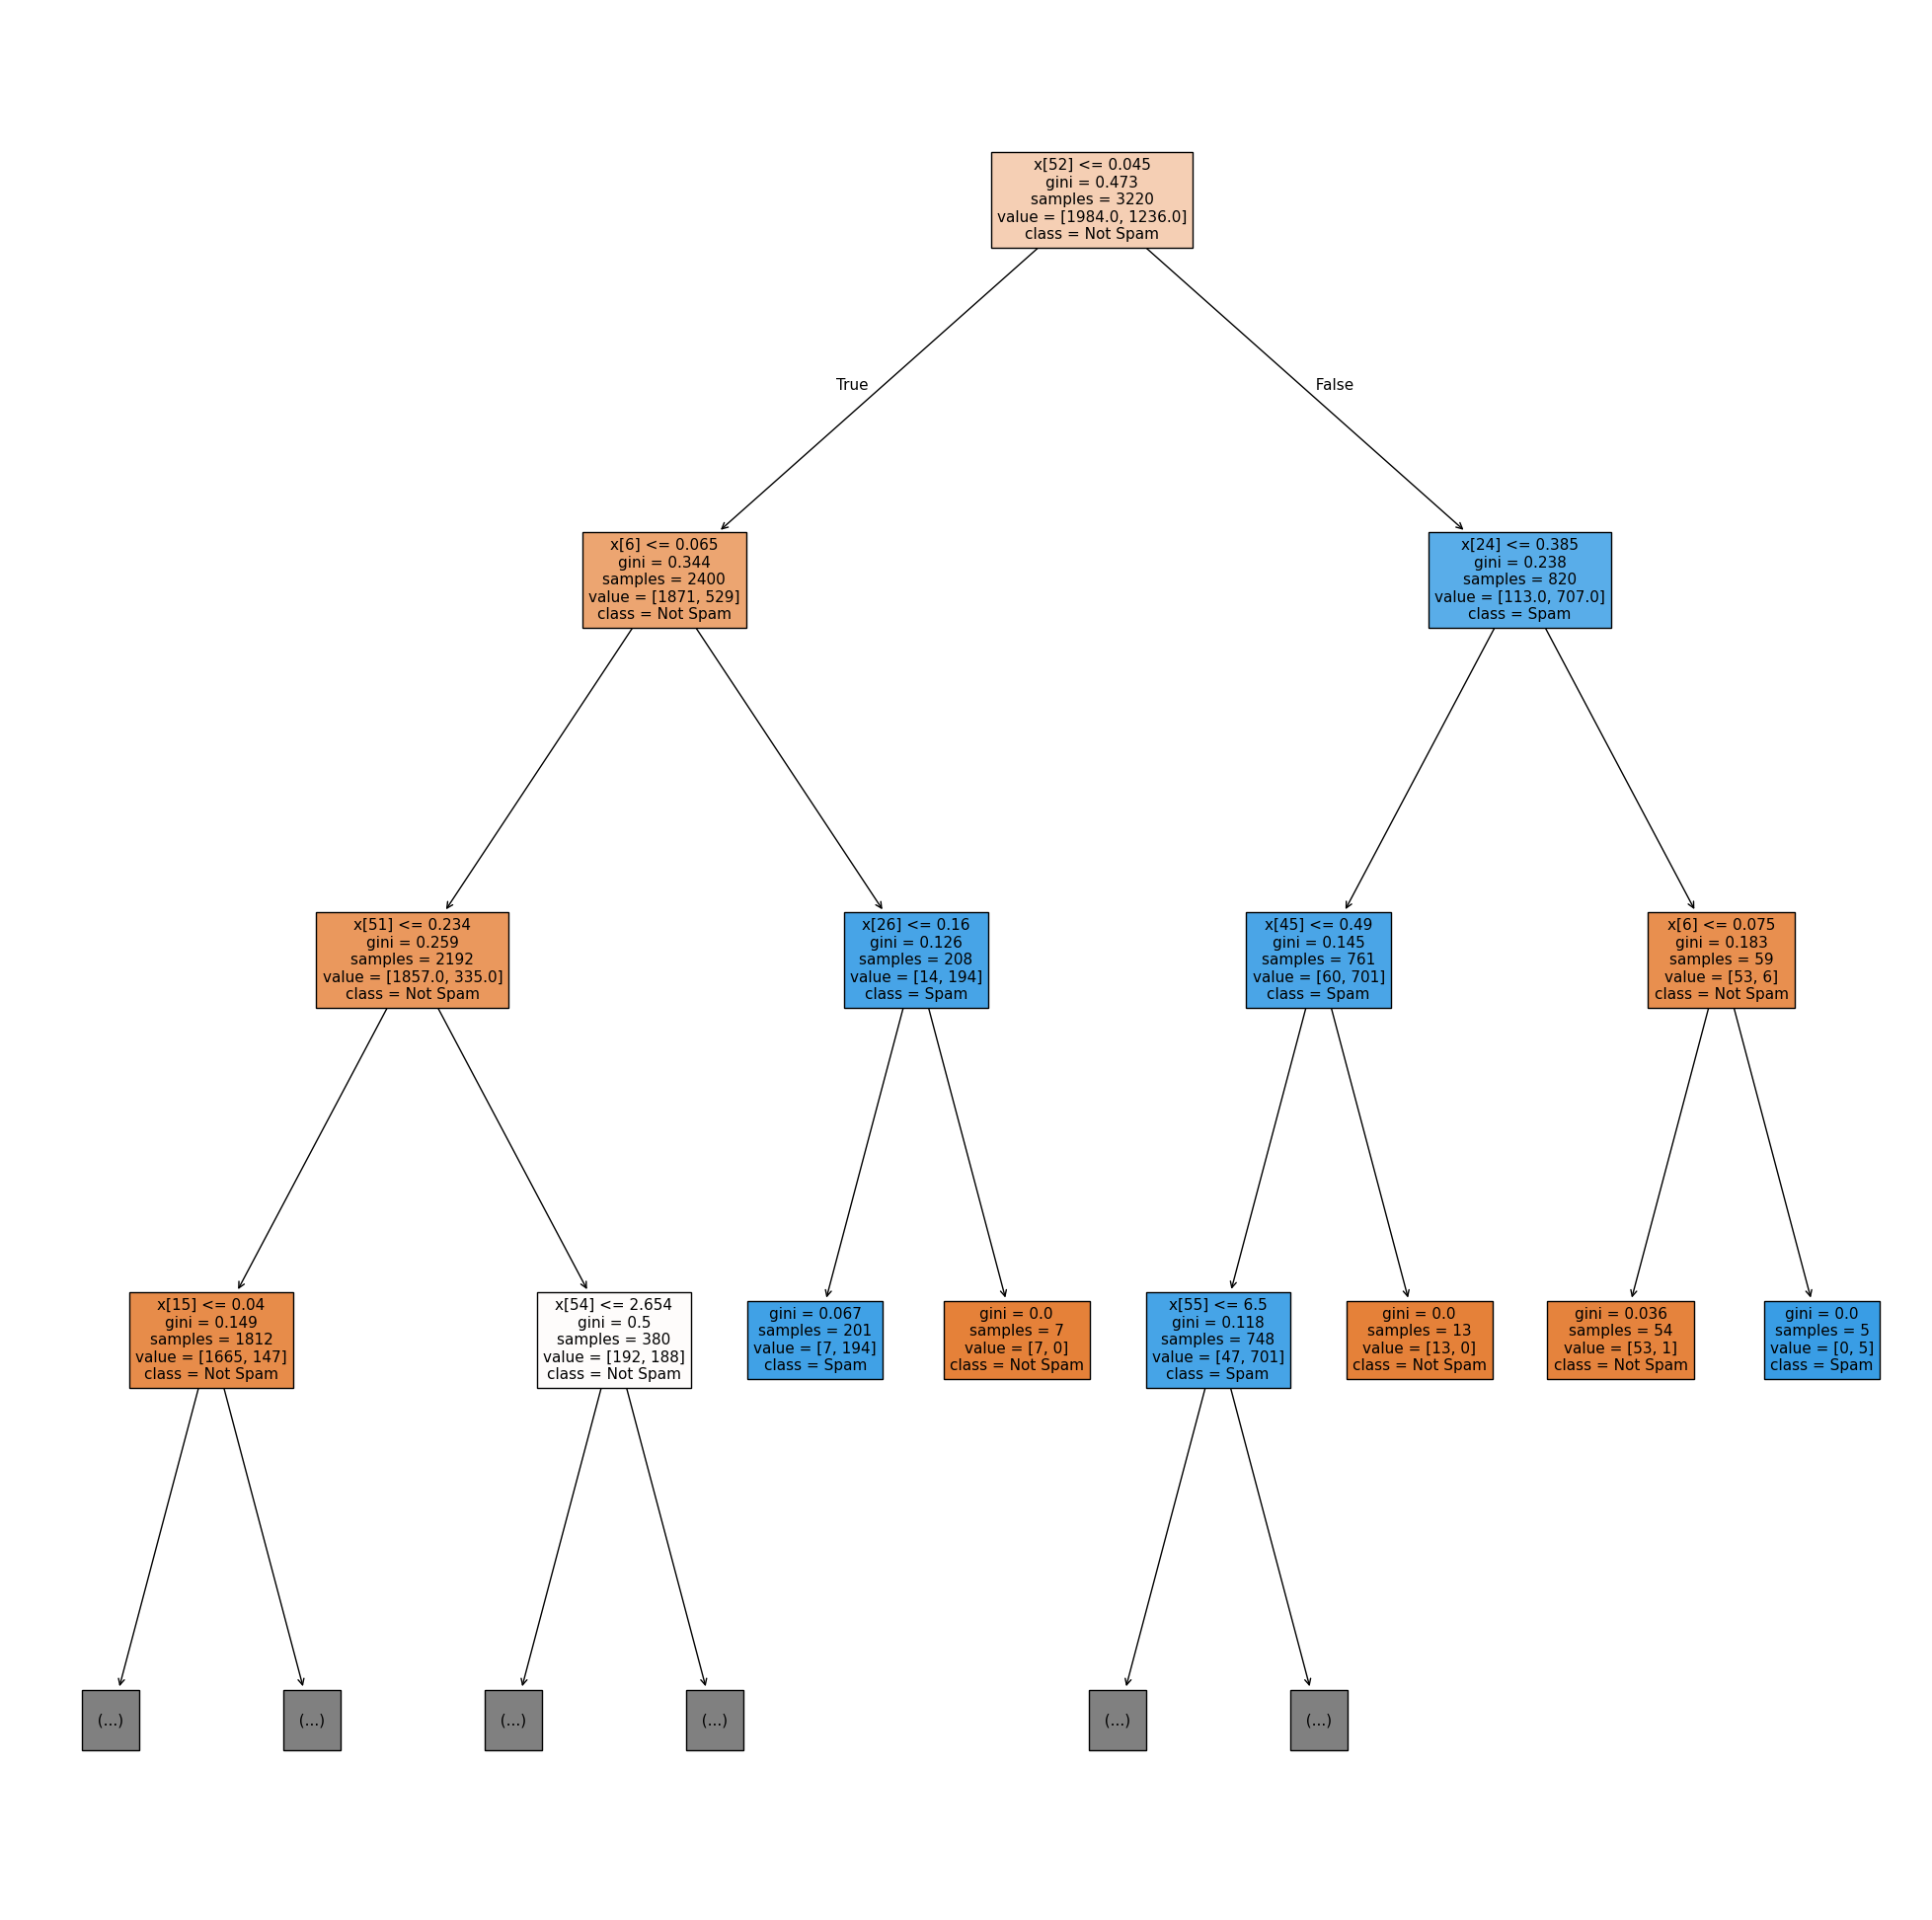

In [ ]:
# Sets the figure size
fig = plt.figure(figsize=(25, 25))

# Creates a visual display of the model.
# Keep max_depth small for better visualization
t = plot_tree(
    best_dt,
    class_names=spam,
    max_depth=3,
    filled=True)

###TEST MODEL

Display the confusion matrix for the test data tst using the optimum decision tree model, best_dt , found in the training phase. A good evaluation
measure is the confusion matrix that gives the fraction of true positives, true negatives, false positives, and false negatives.

###Visualize the Confusion Matrix
Normalize the scores to display as proportions across rows.

Accuracy on testing data: 90.66%


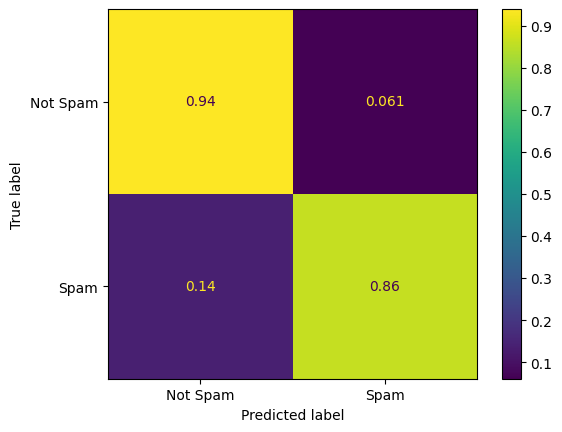

In [ ]:
ConfusionMatrixDisplay.from_estimator(
best_dt, X_tst, y_tst,
display_labels=spam,
normalize='true' )


# Calculate Mean Accuracy on Testing Data

print(
'Accuracy on testing data: '
+ str("{:.2%}".format(best_dt.score(X_tst, y_tst) ) ) )